<h1 style="text-align: center;">Лабораторная работа №6</h1>
<h2 style="text-align: center;">Singular Value Decomposition</h2>
<h3 style="text-align: center;">БАЗА линейной алгебры</h3>

<p style="text-align: center;">Предмет: Практическая линейная алгебра</p>
<p style="text-align: center;"><i>Автор: Made by Polyakov Anton, the part of R3236, suir family</i></p>
<p style="text-align: center;">Преподаватель: Алексей Алексеевич Перегудин</p>
<p style="text-align: center;"><a href="https://github.com/GreedlyCore/practice_linear_algebra_labs">Исходный код, репозиторий</a></p>

## Навигация
1. [Вступление](#paragraph0)
2. [Вспомогательные функции и их описание](#paragraph2)
3. [Содержательная часть](#paragraph1)
    1. [Задание 1. Сжатие изображений ](#subparagraph1)
    2. [ Новогоднее разложение ](#subparagraph2)
4. [Концовка, выводы](#paragraph3)

## Вступление, приветствие <a id="paragraph0"></a>

Добро пожаловать на мою последнюю  лабу по ПЛА. Делал в VS code + jupyter notebook, с экспортом файлов в pdf испытывал дикие проблемы, поэтому будьте осторожны, если захотите нативно отчёты в .ipynb делать. Но мой путь был через два конвентера файлов,  .ipynb -> html -> pdf (via print, CTRL+P)

## Вспомогательные функции и библиотеки, их описание <a id="paragraph2"></a>

Библиотеки, используемые в нашем случае

In [1]:
from matplotlib.image import imread # читатть картинки
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy import linalg as LA # для SVD


Нарисовать график-сравнение до и после для второго задания

In [2]:

def draw_plot2(pic1, pic2):
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(pic1, cmap='gray')
    ax[0].get_xaxis().set_visible(False)
    ax[0].get_yaxis().set_visible(False)
    ax[1].imshow(pic2, cmap='gray')
    ax[0].title.set_text('Original')
    ax[1].title.set_text('Grayscale')
    ax[1].get_xaxis().set_visible(False)
    ax[1].get_yaxis().set_visible(False)
    plt.show()


Узнать "размер" изображение по сумме размерностей его компонент

In [3]:
def size_img (U , S , VT ) :
    return U.shape[0] * U.shape[1] + S.shape[0] + VT.shape[0] * VT.shape[1]

Общая функция для 2-го задания

In [4]:

def draw_plot2_reduced(k, pic):
    U, S, VT = LA.svd(pic , full_matrices = False ) 
    S = np.diag(S)
    approxImage = U[:,:k] @ S[0:k, :k] @ VT[:k, :] # убираем k компонент из матриц
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(pic, cmap='gray')
    ax[0].get_xaxis().set_visible(False)
    ax[0].get_yaxis().set_visible(False)
    ax[1].imshow(approxImage, cmap='gray')
    ax[0].title.set_text(f"Original\ndim is {approxImage.shape}")
    m, n = pic.shape
    # originalSize = m*n
    # comressedSize = k * (1 + m + n)
    originalSize = size_img(U, S, VT)
    comressedSize = size_img(U[:,:k], S[0:k, :k], VT[:k, :])
    ratio = round(100-(((comressedSize * 1.0) / originalSize)*100),2)
    if len(pic.shape)==2:
        ax[1].title.set_text(f"Grayscale \n k = {k}, pressure is {ratio}%")
    else:
        ax[1].title.set_text(f"Colourful \n k = {k}")
    ax[1].get_xaxis().set_visible(False)
    ax[1].get_yaxis().set_visible(False)
    plt.axis('off')
    plt.show()


Сжать каналы отдельно, но в одной функции с параметром $k$

In [5]:

def compressRGB(k, R,G,B):
    channels = []
    for channel in (R,G,B):
        U, S, VT = LA.svd(channel , full_matrices = False ) 
        S = np.diag(S)
        channels.append(U[:,:k] @ S[0:k, :k] @ VT[:k, :])
    return channels


Общая функция для третьего задания

In [6]:

def draw_plot3_reduced(k, pic):
    R = pic[:,:,0] / 0xff # вытаскиваем каналы по отедльности
    G = pic[:,:,1] / 0xff
    B = pic[:,:,2] / 0xff
    channels = compressRGB(k, R,G,B)

    compressed_float = np.dstack(channels)
    compressed = (np.minimum(compressed_float, 1.0) * 0xff).astype(np.uint8)

    fig, ax = plt.subplots(1,2)
    ax[0].imshow(pic, cmap='gray')
    ax[0].get_xaxis().set_visible(False)
    ax[0].get_yaxis().set_visible(False)
    ax[1].imshow(compressed, cmap='gray')
    ax[0].title.set_text(f"Original\ndim is {compressed.shape}")

    m, n, _ = pic.shape
    originalSize = m*n + 2*n*n
    comressedSize = k * (1 + m + n)

    ratio = round(100-(((comressedSize * 1.0) / originalSize)*100),2)
    if len(pic.shape)==2:
        ax[1].title.set_text(f"Grayscale \n k = {k}, pressure is {ratio}%")
    else:
        ax[1].title.set_text(f"Colourful \n k = {k}, pressure is {ratio}%")
    ax[1].get_xaxis().set_visible(False)
    ax[1].get_yaxis().set_visible(False)
    plt.axis('off')
    plt.show()

## Содержательная часть <a id="paragraph1"></a>

### [Задание 1. Сжатие изображений](https://www.youtube.com/watch?v=H7qMMudo3e8) <a id="subparagraph1"></a>
Одно из самых наглядных применений сингулярного разложения. Для начала выбираем какое-нибудь достойное изображение, а лучше сразу два...

<p align="center">
  <img src="cat_original.jpg" />
  <img src="champagne_original.jpg" />
</p>

Представим в виде матрицы, посмотрим как выглядит пиксель изображения теперь и какова размерность матрицы

In [7]:
pic1 = imread("cat.jpg")

print(pic1.shape)
print(pic1[0,0])

(1046, 1053, 3)
[71  0  6]


Получаем изображение $1046\times1053$ пикселей в [RGB](https://en.wikipedia.org/wiki/RGB_color_model?useskin=vector) модели - на каждый пиксель по три числа - три компоненты RGB...

Как преобразовать к оттенкам серого?
Самым простым объяснением кода ниже будет следующая формула: $grayscale = \frac{R+G+B}{3}$. Если мы вспомним реальную жизнь, то при совмещении разных цветов рано или поздно мы приходим к непонятному серому, а потом и к чисто чёрному. В RGB что-то похожее, потому что в оттенках серого все три цвета имеют одинаковые значения. Это объясняет, почему среднее значение от всех цветов RGB дает оттенки серого, когда мы преобразуем изображение в оттенки серого.


(1046, 1053)
25.666666666666668


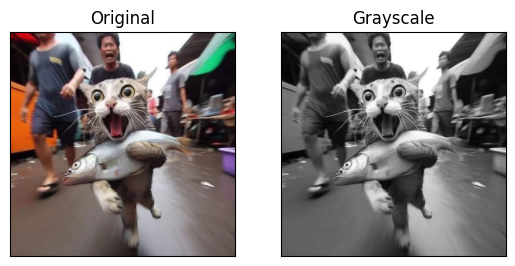

In [8]:
pic1_gray = np.mean(pic1 , -1)
print(pic1_gray.shape)
print(pic1_gray[0,0])

draw_plot2(pic1, pic1_gray)

После преобразования изображения в оттенки серого мы потеряли одну размерность матрицы из-за среднего: $[71\;,\;0,\;6] \rightarrow 25.6$

Выполним SVD-разложение нынешней матрицы...
(картинка для привлечения внимания)

<p align="center">
  <img src="SVD.jpg" />
</p>

In [9]:
U, S, VT = LA.svd(pic1_gray , full_matrices = False ) # S stands for sigma
S = np.diag(S) # так как вернуло вектор, а нам нужна диагональная матрица

Главная прелесть SVD состоит в том, что мы можем произвольно выбрать степень "сжатия" матрицы, при которой качество изображение пострадает не на слишком критичное для нас значение, но позволит выделить под это в разы меньше памяти. Проверим это свойство в действии на нашем изображении...

Оценивать степень сжатия будем через отношение суммы размерностей трёх компонент SVD до и после:
$$
pressure = \frac{k*(1+m+n)}{n*n\;+\;m*n\;+\;n*n}*100\%
$$

Код для определения размерностей тогда будет примерно таким:
```
def size_img (U , S , VT ) :
    return U.shape[0] * U.shape[1] + S.shape[0] + VT.shape[0] * VT.shape[1]
```

$pressure$ в графиках ниже отвечает за степень сжатия, где 100% - максимально сжатие, "пустота", но 0% - оригинальная картинка 

Прогоним наше SVD сжатие с такими значениями $k$, отвечающими за количество сингулярных чисел в разложении: $(5, 10, 30, 50, 100,200,400, 600, 900, 1200)$ 

При уменьшии размерности матриц мы сначала уменьшаем сигма матрицу до $k \times k$, потом уже подстраиваем двух соседей до $m \times k$ и $k \times n$

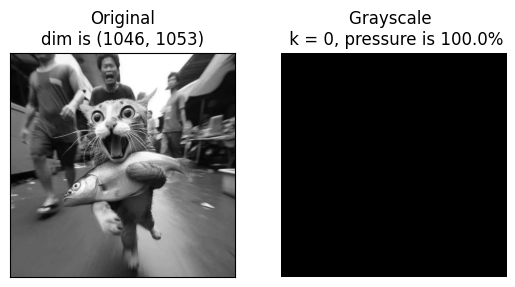

In [10]:
draw_plot2_reduced(0, pic1_gray)

Что и следовало ожидать, если мы взяли ноль сингулярных чисел, то мы ничего не знаем об изображении, а "ничего" = пустота = чёрный цвет :)))

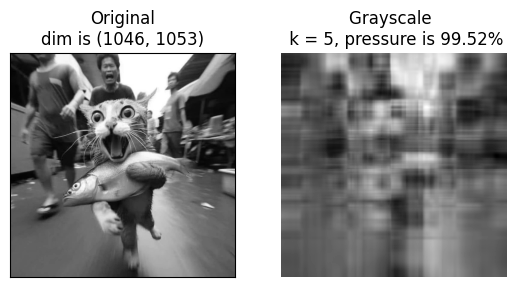

In [11]:
draw_plot2_reduced(5, pic1_gray)

Изображение сжато слишком сильно, кстати, можно заметить "блоки" сжатия, как будто сжимается всё по клеткам. Можно разглядеть лишь очертания мужика на заднем фоне, обратите внимание, что сейчас мы получили основную суть изображения, дальше оно лишь будет уточняться, но никак не новая информация будет появляться.

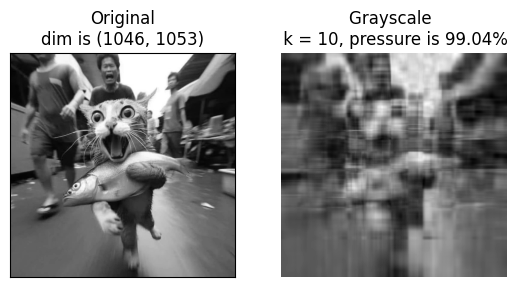

In [12]:
draw_plot2_reduced(10, pic1_gray)

Ничего особо не изменилось, "блоки" сжатия остались, только лишь изображение чётче стало

Также думаю, что именно при $k=10$ и меньше картинка совершенно непонятна

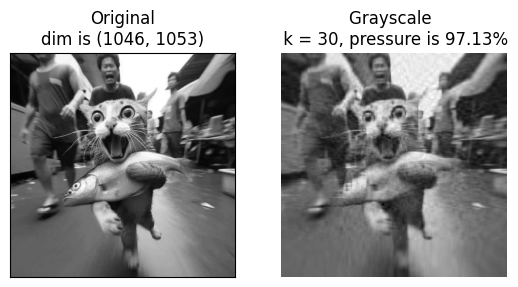

In [13]:
draw_plot2_reduced(30, pic1_gray)

"Блоки" сжатия почти исчезли, чёткость уже достаточно хороша, чтобы понять что происходит, правда рыбка ещё не до конца очертилась. Можно назвать это минимальным $k=30$, при котором изображение имеет минимальное качество и различимо

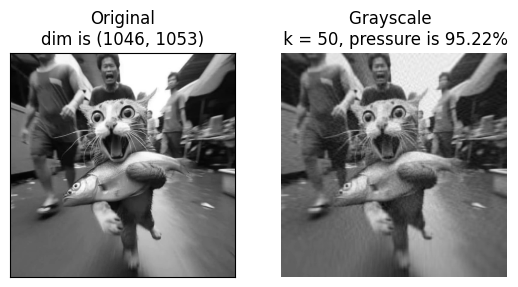

In [14]:
draw_plot2_reduced(50, pic1_gray)

Шум с заднего фона стал уже еле заметен, увеличилась вновь чёткость

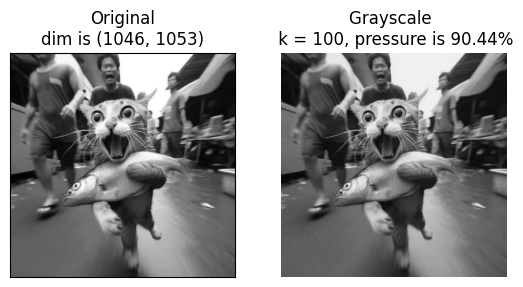

In [15]:
draw_plot2_reduced(100, pic1_gray)

Вновь увеличилась чёткость, изображение уже сильно похоже на оригинал, правда темнее намного него

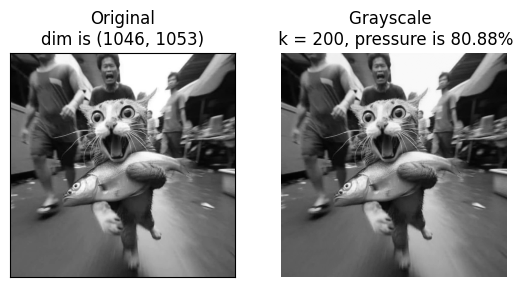

In [16]:
draw_plot2_reduced(200, pic1_gray)

Теперь яркости уравнялись, думаю, что при $k=200$ можно назвать максимальным сжатием, не теряя зримого на глаз качества картинки

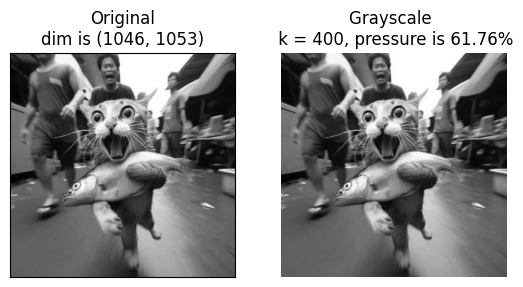

In [17]:
draw_plot2_reduced(400, pic1_gray)

лучше качество, лучше

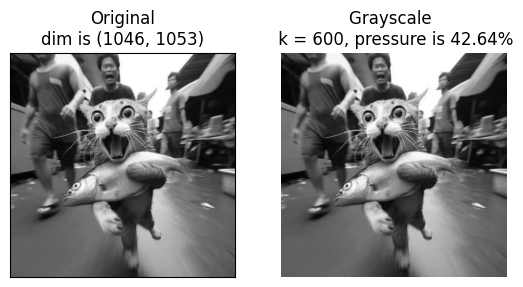

In [18]:
draw_plot2_reduced(600, pic1_gray)

лучше!!!

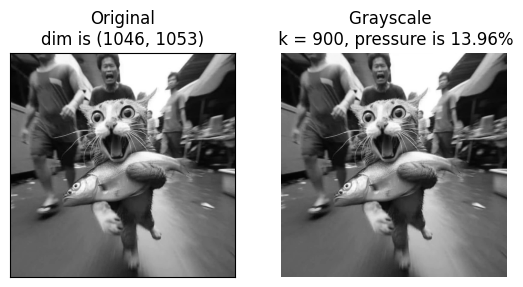

In [19]:
draw_plot2_reduced(900, pic1_gray)

уже близко к оригиналу

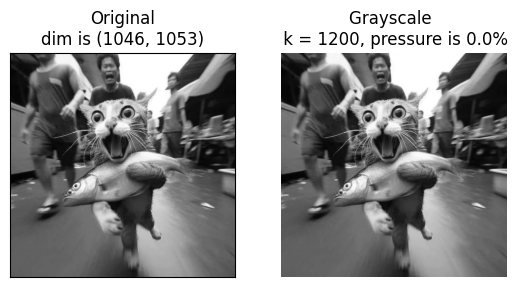

In [20]:
draw_plot2_reduced(1200, pic1_gray)

Если брать сингулярных чисел больше, чем в разложении, то просто получится оригинал, новые то нам неоткуда достать...

### Новогоднее [разложение](https://zerobone.net/blog/cs/svd-image-compression/) !!! <a id="subparagraph2"></a>

Для разложения уже цветных изображений нам понадобится работать с тремя цветовыми каналами независимо по прошлой схеме, а результаты уже складывать в одну картинку, складывая каналы... 

Давайте посмотрим на код, чтобы понять лучше

Взяли изображение примерно $1000 \times 1000$

In [21]:
pic2 = imread("champagne.jpg")
print(pic2.shape)
print(pic2[0,0])

R = pic2[:,:,0] / 0xff # вытаскиваем каналы по отдельности
G = pic2[:,:,1] / 0xff
B = pic2[:,:,2] / 0xff

print(B.shape)

(1280, 1280, 3)
[110  87  79]
(1280, 1280)


In [22]:
# Разложили каналы по SVD
R_U, R_S, R_VT = LA.svd(R)
G_U, G_S, G_VT = LA.svd(G)
B_U, B_S, B_VT = LA.svd(B)

Получили разложение по каналам отдельно, теперь зададимся параметром $k$ и получим сжатое изображение:

In [23]:
k = 30

[136 107 100]


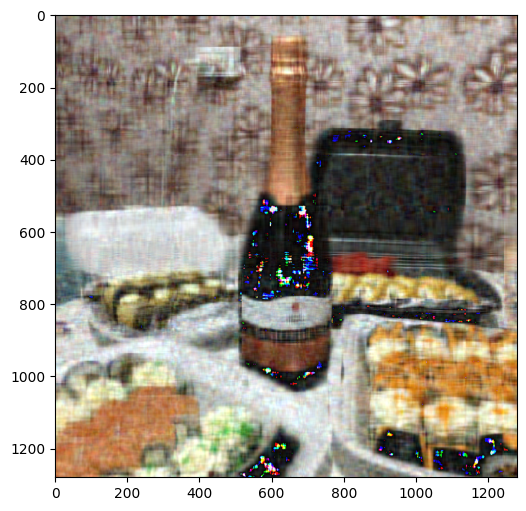

In [24]:
# разложение и сжатие по RGB сразу, см. список функций сверху
channels = compressRGB(k, R,G,B)
# делаем из них матрицу на размерность больше
compressed_float = np.dstack(channels) 
# магическая строка из интернета
compressed = (np.minimum(compressed_float, 1.0) * 0xff).astype(np.uint8) 
print(compressed[0,0])

plt.figure(figsize = (12, 6))
plt.imshow(compressed)

Ух ты, даже новогодние огни зажглись...

Сделаем всё сжатие в одну функцию и запустим сразу при нескольких $k$, _анализ оставим читателю в качестве домашнего задания_...

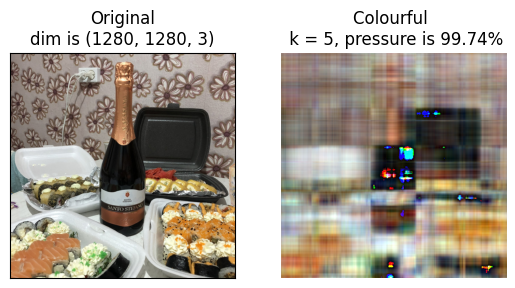

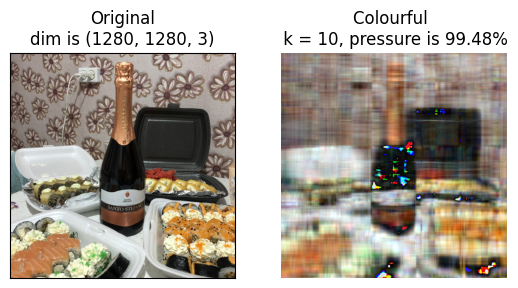

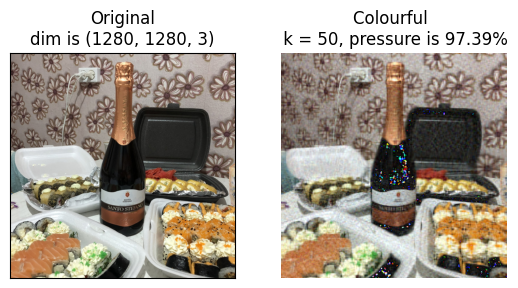

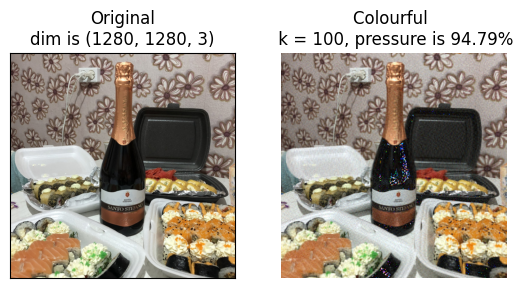

In [25]:
for k in (5,10,50,100,300,500,900):
    draw_plot3_reduced(k, pic2)

## Концовка, выводы <a id="paragraph3"></a>

В итоге мы поняли, что сжимать через сингулярное разложение - не сложно и гипер эффективно. Позволяет выделить в изображение _главные_ детали и избавиться от слишком незначительных деталей, взамен сэкономив много компьютерной памяти.

В нашем случае мы смогли без особых потерь *для среднестатистическего человеческого глаза* откинуть примерно половину сингулярных чисел и получить такое же достостойное изображение.

Думаю эта вещь используется абсолютно везде, начиная с Instagram*, до машинного обучения на большом датасете картинок, теория графов.

_*Организация Meta Platforms Inc. (соцсети Facebook, Instagram) признана экстремистской, её деятельность запрещена на территории России по решению Тверского суда Москвы от 21.03.2022_


Спасибо всем, кто был со мной это непродолжительное время, напоследок хочу поделиться лучшим альбомом этого уходящего года

<p align="center">
  <img src="album.png" />
</p>

<p align="center">
  На этом всё. В целом
</p>